<a href="https://colab.research.google.com/github/ShrutiChrist/Deep-Learning/blob/main/2348545_DL(lab3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Stochastic Gradient Descent with momentum

In [1]:
import numpy as np
var = np.poly1d([0.5, -30, 100])
print("Polynomial function, f(x):\n", var)
derivative = var.deriv()
print("Derivative, f(x)'=", derivative)
starting=20
learning=0.1
momentum=0.9
b=0
descent=[]
while derivative(starting)!=0:
    descent.append(starting)
    b=(b*momentum)+derivative(starting)
    starting=starting-(learning*b)

Polynomial function, f(x):
      2
0.5 x - 30 x + 100
Derivative, f(x)'=  
1 x - 30


### Plotting the results

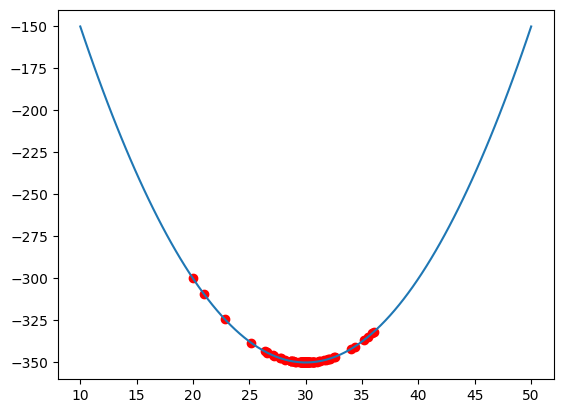

In [2]:
import matplotlib.pyplot as plt

y = var(descent)
x_vals = np.linspace(10, 50, 100)
y_vals = var(x_vals)
plt.plot(x_vals, y_vals)
plt.scatter(descent, y, c='r')
plt.show()

## Lasso, Ridge and Elastic Net Regularisation

### Loading the dataset

In [5]:
import pandas as pd
data=pd.read_csv('/content/cardio_train.csv', delimiter=';')
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### Checking for null values

In [6]:
data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

### Dropping IDs

In [7]:
data=data.drop(columns='id',axis=1)

### Standardising the data

In [8]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=['age','height','weight','ap_hi','ap_lo']
temp = data.drop(x, axis=1)
data=pd.concat([temp, pd.DataFrame(sc.fit_transform(data[x]), columns=x)], axis=1)
data.head()

,gender,cholesterol,gluc,smoke,alco,active,cardio,age,height,weight,ap_hi,ap_lo
0,2,1,1,0,0,1,0,-0.436062,0.443452,-0.847873,-0.122182,-0.088238
1,1,3,1,0,0,1,1,0.307686,-1.018168,0.749831,0.072610,-0.035180
2,1,3,1,0,0,0,1,-0.247997,0.078047,-0.708942,0.007679,-0.141297
3,2,1,1,0,0,1,1,-0.748152,0.565254,0.541435,0.137541,0.017879
4,1,1,1,0,0,0,0,-0.808543,-1.018168,-1.264666,-0.187113,-0.194356


### Splitting the data into train and test

In [9]:
x=data.drop(columns='cardio')
y=data['cardio']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y)

### Importing necessary libraries

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense
from keras import regularizers

### Fitting the first model without any regularization

In [11]:
model = Sequential([
    Dense(input_dim=11,units=64, activation='relu'),
    Dense(units=16, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

In [12]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [13]:
model.fit(x_train, y_train, epochs=100,
          batch_size=1000,
          validation_split=0.2)

Epoch 1/100
45/45 [==============================] - 1s 9ms/step - loss: 0.6662 - accuracy: 0.5946 - val_loss: 0.6460 - val_accuracy: 0.6383
Epoch 2/100
45/45 [==============================] - 0s 4ms/step - loss: 0.6226 - accuracy: 0.6559 - val_loss: 0.6275 - val_accuracy: 0.6642
Epoch 3/100
45/45 [==============================] - 0s 4ms/step - loss: 0.6043 - accuracy: 0.6798 - val_loss: 0.6147 - val_accuracy: 0.6827
Epoch 4/100
45/45 [==============================] - 0s 4ms/step - loss: 0.5854 - accuracy: 0.7031 - val_loss: 0.6009 - val_accuracy: 0.7034
Epoch 5/100
45/45 [==============================] - 0s 4ms/step - loss: 0.5703 - accuracy: 0.7196 - val_loss: 0.5966 - val_accuracy: 0.7195
Epoch 6/100
45/45 [==============================] - 0s 4ms/step - loss: 0.5633 - accuracy: 0.7271 - val_loss: 0.5961 - val_accuracy: 0.7247
Epoch 7/100
45/45 [==============================] - 0s 5ms/step - loss: 0.5593 - accuracy: 0.7299 - val_loss: 0.5967 - val_accuracy: 0.7258
Epoch 8/100
4

### Second model with L1 Regularization

In [14]:
model1 = Sequential([
    Dense(input_dim=11,units=64, activation='relu',kernel_regularizer=regularizers.l1(0.01)),
    Dense(units=16, activation='relu',kernel_regularizer=regularizers.l1(0.01)),
    Dense(units=1, activation='sigmoid')
])

In [15]:
model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [16]:
model1.fit(x_train, y_train, epochs=100,
          batch_size=1000,
          validation_split=0.2)

Epoch 1/100
45/45 [==============================] - 1s 8ms/step - loss: 2.7309 - accuracy: 0.5954 - val_loss: 2.3780 - val_accuracy: 0.6190
Epoch 2/100
45/45 [==============================] - 0s 4ms/step - loss: 2.0847 - accuracy: 0.6330 - val_loss: 1.8031 - val_accuracy: 0.6279
Epoch 3/100
45/45 [==============================] - 0s 4ms/step - loss: 1.5715 - accuracy: 0.6379 - val_loss: 1.3535 - val_accuracy: 0.6321
Epoch 4/100
45/45 [==============================] - 0s 4ms/step - loss: 1.1783 - accuracy: 0.6389 - val_loss: 1.0203 - val_accuracy: 0.6335
Epoch 5/100
45/45 [==============================] - 0s 5ms/step - loss: 0.9024 - accuracy: 0.6396 - val_loss: 0.8035 - val_accuracy: 0.6346
Epoch 6/100
45/45 [==============================] - 0s 4ms/step - loss: 0.7407 - accuracy: 0.6404 - val_loss: 0.7026 - val_accuracy: 0.6375
Epoch 7/100
45/45 [==============================] - 0s 4ms/step - loss: 0.6872 - accuracy: 0.6428 - val_loss: 0.6844 - val_accuracy: 0.6413
Epoch 8/100
4

### Third model with L2 Regularization

In [17]:
model2 = Sequential([
    Dense(input_dim=11,units=64, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    Dense(units=16, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    Dense(units=1, activation='sigmoid')
])

In [18]:
model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [19]:
model2.fit(x_train, y_train, epochs=100,
          batch_size=1000,
          validation_split=0.2)

Epoch 1/100
45/45 [==============================] - 1s 9ms/step - loss: 1.0158 - accuracy: 0.6359 - val_loss: 0.9316 - val_accuracy: 0.6450
Epoch 2/100
45/45 [==============================] - 0s 4ms/step - loss: 0.8641 - accuracy: 0.6553 - val_loss: 0.8177 - val_accuracy: 0.6534
Epoch 3/100
45/45 [==============================] - 0s 4ms/step - loss: 0.7714 - accuracy: 0.6628 - val_loss: 0.7458 - val_accuracy: 0.6641
Epoch 4/100
45/45 [==============================] - 0s 4ms/step - loss: 0.7135 - accuracy: 0.6699 - val_loss: 0.7022 - val_accuracy: 0.6676
Epoch 5/100
45/45 [==============================] - 0s 4ms/step - loss: 0.6780 - accuracy: 0.6736 - val_loss: 0.6764 - val_accuracy: 0.6703
Epoch 6/100
45/45 [==============================] - 0s 4ms/step - loss: 0.6560 - accuracy: 0.6777 - val_loss: 0.6599 - val_accuracy: 0.6760
Epoch 7/100
45/45 [==============================] - 0s 4ms/step - loss: 0.6422 - accuracy: 0.6818 - val_loss: 0.6506 - val_accuracy: 0.6800
Epoch 8/100
4

### Fourth with Elastic Net regularization

In [20]:
model3 = Sequential([
    Dense(input_dim=11,units=64, activation='relu',kernel_regularizer=regularizers.l1_l2(0.01)),
    Dense(units=16, activation='relu',kernel_regularizer=regularizers.l1_l2(0.01)),
    Dense(units=1, activation='sigmoid')
])

In [21]:
model3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [22]:
model3.fit(x_train, y_train, epochs=100,
          batch_size=1000,
          validation_split=0.2)

Epoch 1/100
45/45 [==============================] - 1s 9ms/step - loss: 3.1144 - accuracy: 0.5447 - val_loss: 2.6814 - val_accuracy: 0.5795
Epoch 2/100
45/45 [==============================] - 0s 4ms/step - loss: 2.3356 - accuracy: 0.5952 - val_loss: 2.0035 - val_accuracy: 0.6027
Epoch 3/100
45/45 [==============================] - 0s 5ms/step - loss: 1.7443 - accuracy: 0.6122 - val_loss: 1.4982 - val_accuracy: 0.6127
Epoch 4/100
45/45 [==============================] - 0s 4ms/step - loss: 1.3108 - accuracy: 0.6236 - val_loss: 1.1362 - val_accuracy: 0.6189
Epoch 5/100
45/45 [==============================] - 0s 5ms/step - loss: 1.0069 - accuracy: 0.6236 - val_loss: 0.8894 - val_accuracy: 0.6123
Epoch 6/100
45/45 [==============================] - 0s 7ms/step - loss: 0.8118 - accuracy: 0.6199 - val_loss: 0.7484 - val_accuracy: 0.6139
Epoch 7/100
45/45 [==============================] - 0s 6ms/step - loss: 0.7220 - accuracy: 0.6250 - val_loss: 0.7064 - val_accuracy: 0.6167
Epoch 8/100
4

### Predicting the values

In [23]:
Y_PREC = np.where(1 , model.predict(x_test) > 0.5, 0)
Y_PREC1 = np.where(1 , model1.predict(x_test) > 0.5, 0)
Y_PREC2 = np.where(1 , model2.predict(x_test) > 0.5, 0)
Y_PREC3 = np.where(1 , model3.predict(x_test) > 0.5, 0)

438/438 [==============================] - 1s 1ms/step


### Confusion matrix

In [24]:
from sklearn.metrics import confusion_matrix
print("Without Regularization \n",confusion_matrix(y_test,Y_PREC))
print("L1 Regularization \n",confusion_matrix(y_test,Y_PREC1))
print("L2 Regularization \n",confusion_matrix(y_test,Y_PREC2))
print("Elastic Net Regularization \n",confusion_matrix(y_test,Y_PREC3))

Without Regularization 
 [[5334 1670]
 [2101 4895]]
L1 Regularization 
 [[5370 1634]
 [2274 4722]]
L2 Regularization 
 [[5415 1589]
 [2353 4643]]
Elastic Net Regularization 
 [[7004    0]
 [6996    0]]


### Accuracy Score

In [25]:
from sklearn.metrics import accuracy_score
print("Without Regularization \n",accuracy_score(y_test,Y_PREC))
print("L1 Regularization \n",accuracy_score(y_test,Y_PREC1))
print("L2 Regularization \n",accuracy_score(y_test,Y_PREC2))
print("Elastic Net Regularization \n",accuracy_score(y_test,Y_PREC3))

Without Regularization 
 0.7306428571428571
L1 Regularization 
 0.7208571428571429
L2 Regularization 
 0.7184285714285714
Elastic Net Regularization 
 0.5002857142857143


### Precision and Recall

In [26]:
from sklearn.metrics import recall_score,precision_score
print("  Recall            Precision")
print("Without Regularization \n",recall_score(y_test,Y_PREC),precision_score(y_test,Y_PREC))
print("L1 Regularization \n",recall_score(y_test,Y_PREC1),precision_score(y_test,Y_PREC1))
print("L2 Regularization \n",recall_score(y_test,Y_PREC2),precision_score(y_test,Y_PREC2))
print("Elastic Net Regularization \n",recall_score(y_test,Y_PREC3),precision_score(y_test,Y_PREC3))

  Recall            Precision
Without Regularization 
 0.699685534591195 0.7456207159177456
L1 Regularization 
 0.6749571183533448 0.7429200755191945
L2 Regularization 
 0.6636649514008005 0.74502567394095
Elastic Net Regularization 
 0.0 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### ROC curve

Text(0.5, 1.0, 'Receiver operating characteristic')

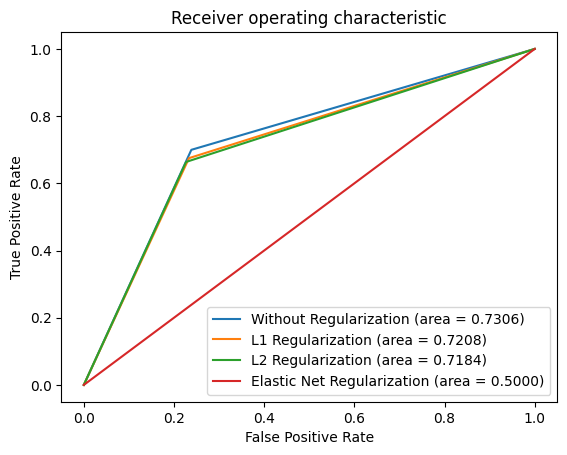

In [28]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
roc_auc=roc_auc_score(y_test,Y_PREC)
roc_auc1=roc_auc_score(y_test,Y_PREC1)
roc_auc2=roc_auc_score(y_test,Y_PREC2)
roc_auc3=roc_auc_score(y_test,Y_PREC3)
fpr, tpr,_= roc_curve(y_test,Y_PREC)
fpr1, tpr1,_= roc_curve(y_test,Y_PREC1)
fpr2, tpr2,_= roc_curve(y_test,Y_PREC2)
fpr3, tpr3,_= roc_curve(y_test,Y_PREC3)
plt.figure()
plt.plot(fpr, tpr,label='Without Regularization (area = %0.4f)' % roc_auc)
plt.plot(fpr1, tpr1, label='L1 Regularization (area = %0.4f)' % roc_auc1)
plt.plot(fpr2, tpr2, label='L2 Regularization (area = %0.4f)' % roc_auc2)
plt.plot(fpr3, tpr3, label='Elastic Net Regularization (area = %0.4f)' % roc_auc3)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')